## Multi Class Logistic Regression

Target da 2 den fazla class varsa!

## Data Seti

Iris veri kümesi, istatistik ve makine öğrenimi uygulamalarında sıkça kullanılan bir veri setidir. Bu veri kümesi, İngiliz biyolog ve istatistikçi Ronald A. Fisher tarafından 1936'da tanıtılmıştır ve çoğunlukla sınıflandırma algoritmalarını eğitim ve test etmek için kullanılır.

Iris veri kümesinde üç farklı iris çiçeği türü bulunmaktadır:

Iris-setosa Iris-versicolour Iris-virginica Her bir çiçek türü için 50 örnek bulunmaktadır, toplamda 150 örnekten oluşur.

Her bir örnek için dört özellik (feature) kaydedilmiştir:

Taç yaprağının uzunluğu (sepal length) Taç yaprağının genişliği (sepal width) Çiçek yaprağının uzunluğu (petal length) Çiçek yaprağının genişliği (petal width) Bu özellikler santimetre (cm) cinsinden ölçülmüştür.

Amaç, bu dört özellik yardımıyla çiçeklerin hangi türe ait olduğunu tahmin eden bir model oluşturmaktır. Yani, iris veri kümesi, denetimli öğrenme (supervised learning) problemi için bir veri kümesi olarak kullanılır.

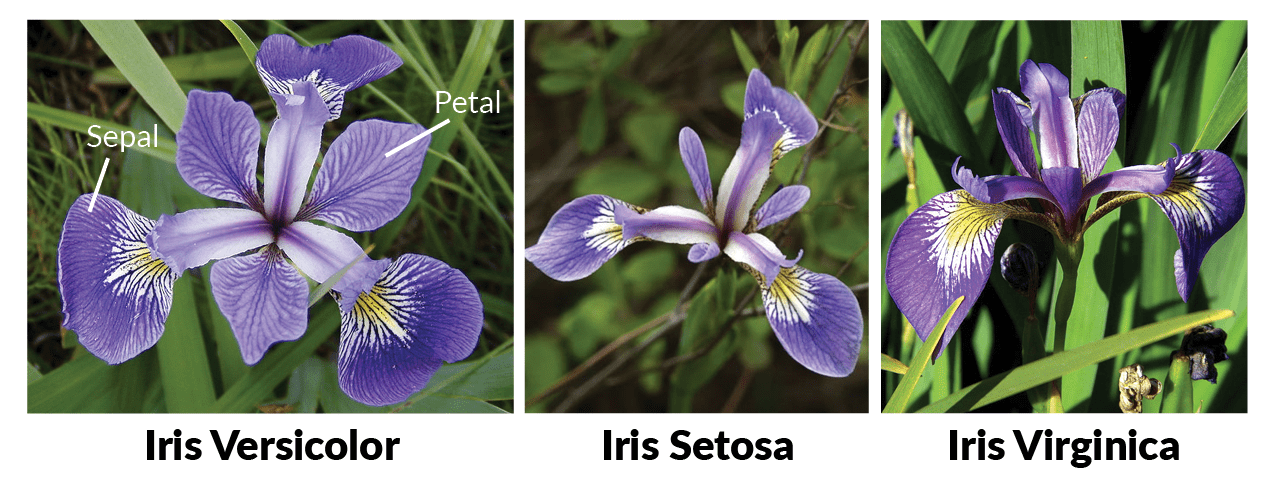

## Import Library

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("iris.csv")
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0         5.100        3.500         1.400        0.200  setosa
1         4.900        3.000         1.400        0.200  setosa
2         4.700        3.200         1.300        0.200  setosa
3         4.600        3.100         1.500        0.200  setosa
4         5.000        3.600         1.400        0.200  setosa

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe().T

count  mean   std   min   25%   50%   75%   max
sepal_length 150.000 5.843 0.828 4.300 5.100 5.800 6.400 7.900
sepal_width  150.000 3.057 0.436 2.000 2.800 3.000 3.300 4.400
petal_length 150.000 3.758 1.765 1.000 1.600 4.350 5.100 6.900
petal_width  150.000 1.199 0.762 0.100 0.300 1.300 1.800 2.500

In [5]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

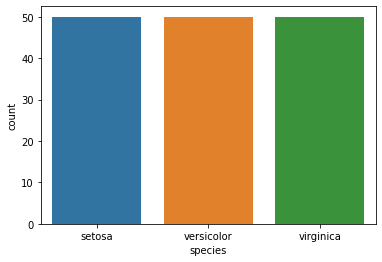

In [6]:
sns.countplot(df["species"]);

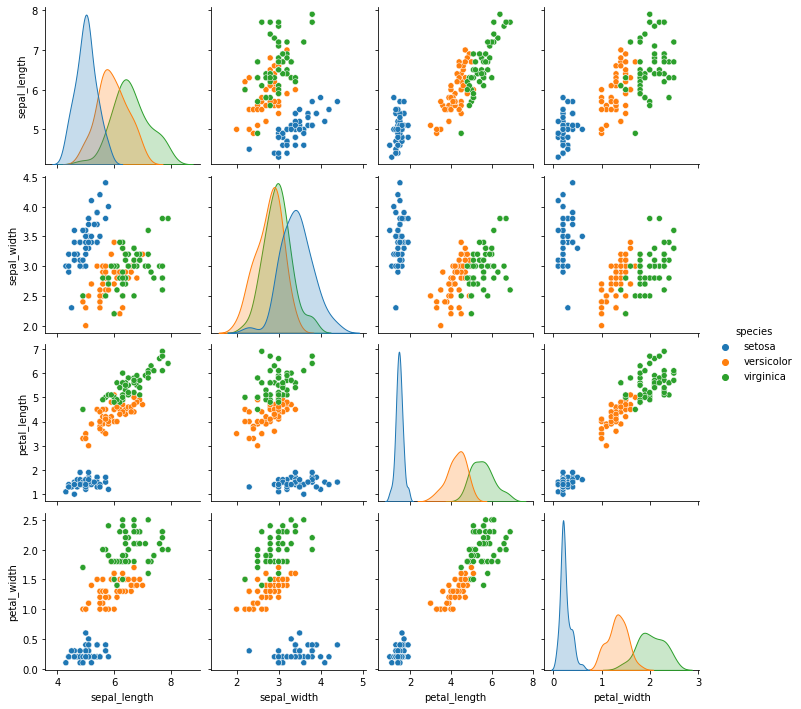

In [7]:
sns.pairplot(df, hue = "species"); ## Classification modellerde hue ya hep target vereceğiz.

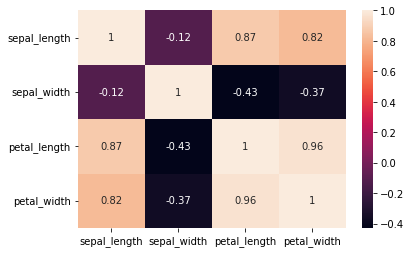

In [8]:
sns.heatmap(df.corr(), annot = True);

In [9]:
from mpl_toolkits.mplot3d import Axes3D

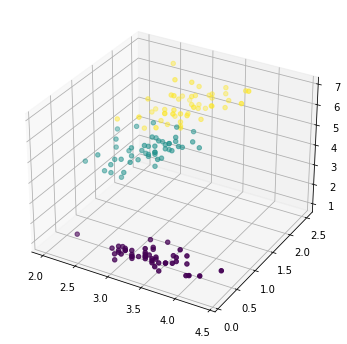

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
ax.scatter(df["sepal_width"], df["petal_width"], df["petal_length"], c=colors);

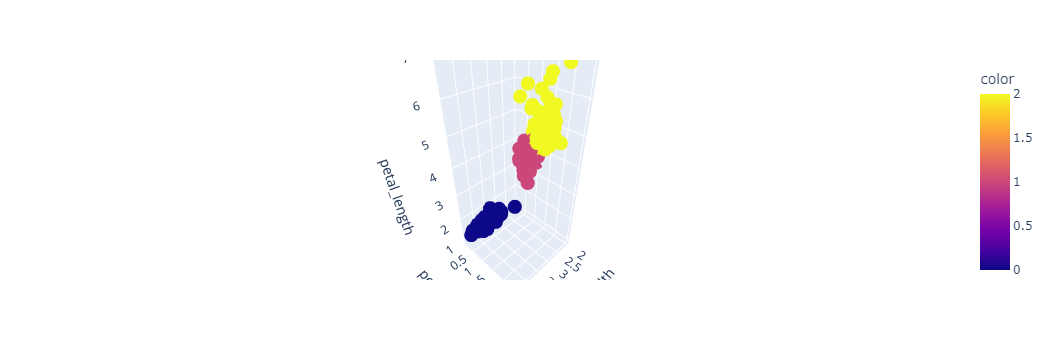

In [13]:
import plotly.express as px
colors = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
fig = px.scatter_3d(df, x="sepal_width", y="petal_width", z="petal_length", color=colors)
fig.show()

## Train | Test Split

In [17]:
X = df.drop("species", axis = 1)
y = df["species"]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Scaling

In [20]:
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

#### With Default Parameters

In [23]:
log_model = LogisticRegression()

In [24]:
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

olasiliklar satir bazinda 1' dir

Binary target dan farkli olarak burada 3 ve daha fazla class olabileceginden olasiligi buyuk olan class i tahmin eder

0.5 gibi bir kesme noktasi multiclass ta yoktur

In [25]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.97574947e-01, 2.42503754e-03, 1.54293514e-08],
       [9.92629804e-01, 7.37006329e-03, 1.32922697e-07],
       [9.73790847e-01, 2.62066733e-02, 2.47982136e-06],
       [4.02847906e-04, 3.54599015e-01, 6.44998137e-01],
       [9.14885119e-03, 8.51714939e-01, 1.39136210e-01],
       [1.01797139e-03, 3.28773330e-01, 6.70208699e-01],
       [6.10449788e-04, 6.45974426e-01, 3.53415124e-01],
       [8.19190985e-03, 8.86796207e-01, 1.05011883e-01],
       [2.20541739e-04, 1.87962520e-01, 8.11816938e-01],
       [9.13848213e-01, 8.61499725e-02, 1.81402681e-06],
       [7.33058032e-04, 1.60762050e-01, 8.38504892e-01],
       [9.97950399e-01, 2.04959066e-03, 1.07662632e-08],
       [9.40317983e-01, 5.96797910e-02, 2.22606251e-06],
       [1.77758388e-06, 2.64146465e-02, 9.73583576e-01],
       [5.71832608e-03, 3.89263746e-01, 6.05017928e-01],
       [1.35583879e-02, 9.04991459e-01, 8.14501527e-02],
       [9.63103339e-02, 8.46121697e-01, 5.75679695e-02],
       [5.14009832e-02, 8.75025

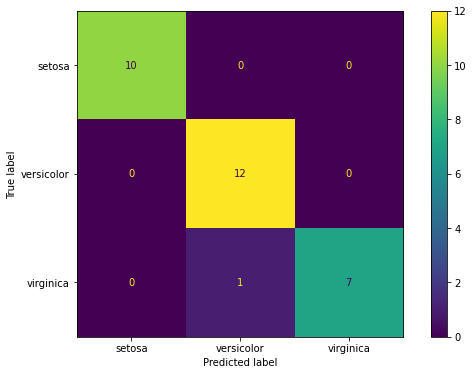

In [26]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

Multi class bir modelde hangi classa göre confusion matrix e bakıytorsak o class ın kesişimleri True Pozitif olur diğer class ların kesişimleri ise True Negatif olaru seçtiğimiz class 1 diğerleri 0 gibi düşünmelşiyiz.

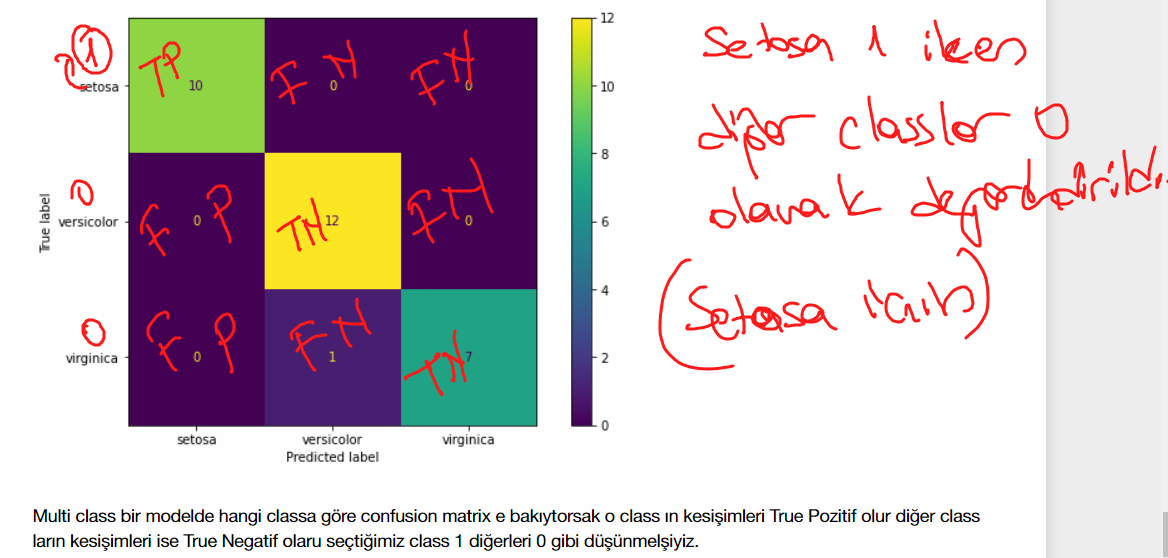

In [27]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

Dengesiz Veri Setleri: Eğer bir sınıflandırma problemi üzerinde çalışıyorsanız ve veri setiniz dengesizse (örneğin, bir sınıfta çok fazla örnek ve diğerlerinde çok az örnek varsa) sadece doğruluk (accuracy) kullanarak modelin performansını ölçmek yanıltıcı olabilir. Özellikle, modeliniz çoğunluk sınıfına önyargılı olabilir ve yine de yüksek doğruluk elde edebilir.

Macro Average: Dengesiz veri setlerinde, her sınıfın performansını eşit olarak değerlendirmek için macro-average F1 skoru, precision veya recall gibi ölçümler kullanılabilir. Bu ölçümler, tüm sınıfların performansını eşit ağırlıkta dikkate alır.

Doğruluk (Accuracy): Eğer veri setiniz dengeliyse, yani tüm sınıflarda benzer sayıda örnek varsa, doğruluk modelinizin genel performansını ölçmek için kullanılabilir.

Weighted Average: Eğer bazı sınıfların performansını diğerlerinden daha önemli buluyorsanız, bu sınıflara daha fazla ağırlık verilerek hesaplanan weighted-average F1 skoru, precision veya recall kullanılabilir.

Eğer "benim için hepsi önemli" diyorsanız ve veri setiniz dengeliyse doğruluk kullanabilirsiniz. Ancak, veri setiniz dengesizse ve tüm sınıfların performansını eşit olarak değerlendirmek istiyorsanız macro-average ölçümlere bakmanız daha uygun olacaktır.

In [28]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



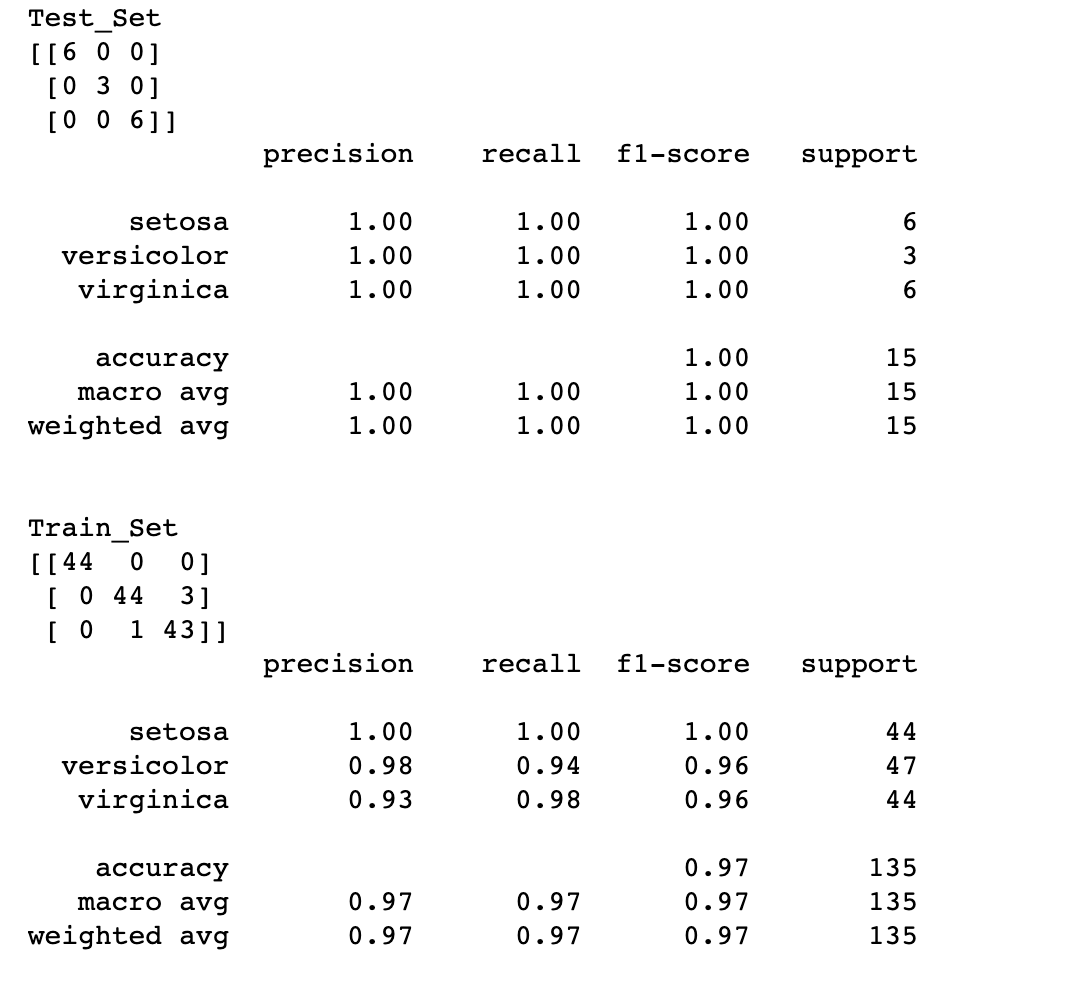

### Sabahattin beyin test size = 0.1 ile aldığı skorlar

## Cross Validate

In [29]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.950
test_precision_weighted   0.960
test_recall_weighted      0.950
test_f1_weighted          0.949
dtype: float64

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

## Seçtiğimiz bir class a (Versicolor) göre Cross Validate birgün bir yerde ihtiyaç duyarsanız.

In [30]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"]) ## labels gelirse average a değer girmeyi bekler.
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])

CV yaparken her zaman model sıfırlanıyor. Alttaki kodda "model = LogisticRegression()" yazan yer modelin sıfırlandığını göstermekte.

In [31]:
model = LogisticRegression() ## model sıfırlandı

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_versicolor":f1_versicolor, 
                                                                   "precision_versicolor":precision_versicolor,
                                                                   "recall_versicolor":recall_versicolor}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_versicolor          0.924
test_precision_versicolor   0.940
test_recall_versicolor      0.925
dtype: float64

## Proba

In [32]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)

sepal_length  sepal_width  petal_length  petal_width     species  \
31          5.400        3.400         1.500        0.400      setosa   
114         5.800        2.800         5.100        2.400   virginica   
50          7.000        3.200         4.700        1.400  versicolor   
96          5.700        2.900         4.200        1.300  versicolor   
147         6.500        3.000         5.200        2.000   virginica   
1           4.900        3.000         1.400        0.200      setosa   
90          5.500        2.600         4.400        1.200  versicolor   
25          5.000        3.000         1.600        0.200      setosa   
129         7.200        3.000         5.800        1.600   virginica   
127         6.100        3.000         4.900        1.800   virginica   

           pred  pred_proba_setosa  pred_proba_versicolar  \
31       setosa              0.940                  0.060   
114   virginica              0.000                  0.029   
50   versicolor              0.009                  0.852   
96   versicolor              0.051                  0.875   
147   virginica              0.001                  0.161   
1        setosa              0.914                  0.086   
90   versicolor              0.022                  0.894   
25       setosa              0.882                  0.118   
129   virginica              0.000                  0.355   
127   virginica              0.006                  0.389   

     pred_proba_virginica  
31                  0.000  
114                 0.971  
50                  0.139  
96                  0.074  
147                 0.839  
1                   0.000  
90                  0.084  
25                  0.000  
129                 0.645  
127                 0.605

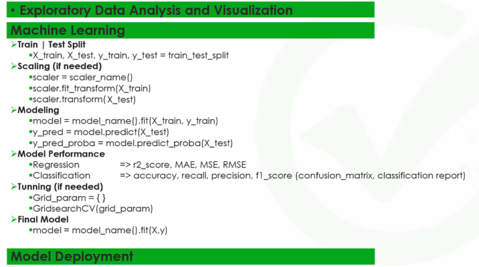

##  With Best Parameters (GridsearchCV)

In [40]:
log_model = LogisticRegression(max_iter=100000, random_state=42)

In [41]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) ## Alpha nın tersi şeklinde çalışıyor

param_grid = {"penalty" : penalty,
             "C" : C}

In [42]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=10)

In [43]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=100000, random_state=42),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [44]:
grid_model.best_params_

{'C': 7.847599703514611, 'penalty': 'l2'}

In [46]:
grid_model.best_score_

0.9666666666666666

In [47]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

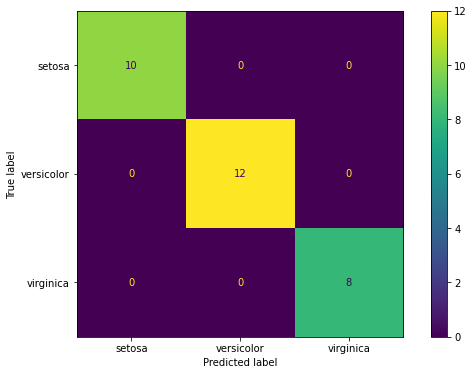

In [48]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.show()

In [49]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.97      0.97        38
   virginica       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [50]:
from sklearn.metrics import plot_roc_curve

In [51]:
plot_roc_curve(grid_model, X_test_scaled, y_test); # hata verir

ValueError: Expected 'estimator' to be a binary classifier, but got GridSearchCV fit on multiclass (3 classes) data

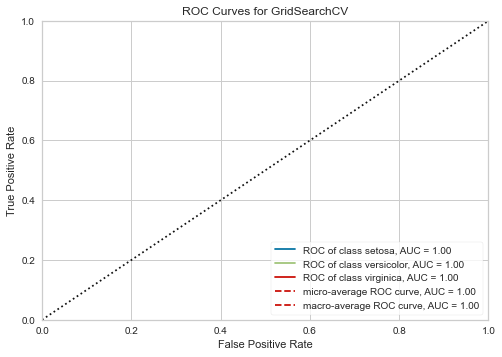

In [52]:
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();       

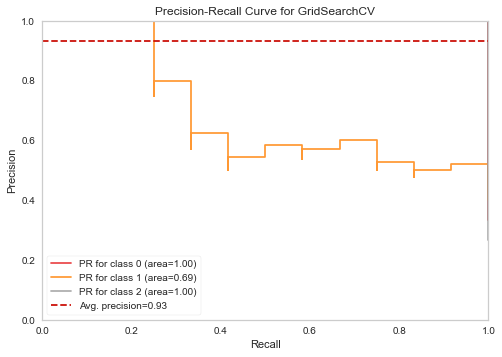

In [53]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,#buraya bunu vermezsek binary gibi çalışır.
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

Dengeli data setlerinde ROCAUC skoruna dengesiz data setlerinde Precission Recall Curve skorlarına ve görsellerine bakacağız.

## Final Model and Model Deployment

In [54]:
scaler = StandardScaler().fit(X) #bütün datayı scale yapıyorum

In [55]:
import pickle
pickle.dump(scaler, open("scaler_iris", 'wb')) #scale modelimi kayıt ediyorum

In [56]:
X_scaled = scaler.transform(X) #sonra transform yapıyorum

In [57]:
final_model = LogisticRegression().fit(X_scaled, y)#final modelimi oluşturuyorum

In [58]:
pickle.dump(final_model, open("final_model_iris", 'wb'))#onuda kayıt ediyorum

In [59]:
X.describe().T#describe bakıyorum ki buradaki skorlara yakın skorlar verip tahmin yapacağı

count  mean   std   min   25%   50%   75%   max
sepal_length 150.000 5.843 0.828 4.300 5.100 5.800 6.400 7.900
sepal_width  150.000 3.057 0.436 2.000 2.800 3.000 3.300 4.400
petal_length 150.000 3.758 1.765 1.000 1.600 4.350 5.100 6.900
petal_width  150.000 1.199 0.762 0.100 0.300 1.300 1.800 2.500

In [60]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]
          }

In [61]:
sample = pd.DataFrame(my_dict)
sample

sepal_length  sepal_width  petal_length  petal_width
0         4.500        2.200         1.300        0.200
1         5.800        3.000         4.300        1.300
2         7.500        4.200         6.500        2.300